In [62]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [63]:
#upload media.csv and markets.csv
media_data = pd.read_csv("media_train.csv", index_col = 0, parse_dates = ['pub_date'])
media_data_test = pd.read_csv("media_test.csv", index_col = 0, parse_dates = ['pub_date'])
markets_data = pd.read_csv("markets_train.csv", parse_dates = ['Date'])
markets_data_test = pd.read_csv("markets_test.csv", parse_dates = ['Date'])

media_data = media_data.loc[media_data['relevance_rank']<=2]
media_data_test = media_data_test.loc[media_data_test['relevance_rank']<=2]

## Adding close stock price for different days after article is published

In [64]:
#different days for which stock close price is saved once article is published
days = [0,1,2,3,4]

for i in days:
    stock_price = []

    for pub_time in media_data.pub_date:
        time1 = pub_time
        
        for j in range(len(markets_data)):
            
            market_time = markets_data.Date[j]
            time2 = market_time

            if time1 < time2:    
                if j+i<len(markets_data):
                    price = markets_data.Close[j+i]
                else:
                    price = np.NaN
                stock_price.append(price)
                
                break

            elif j == len(markets_data)-1:
                price = np.NaN
                stock_price.append(price)
                break
            
    media_data['stock_price_'+str(i)] = stock_price

In [65]:
#repeating the same process for test data
#different days for which stock close price is saved once article is published
days = [0,1,2,3,4]

for i in days:
    stock_price = []

    for pub_time in media_data_test.pub_date:
        time1 = pub_time
        
        for j in range(len(markets_data_test)):
            
            market_time = markets_data_test.Date[j]
            time2 = market_time

            if time1 < time2:    
                if j+i<len(markets_data_test):
                    price = markets_data_test.Close[j+i]
                else:
                    price = np.NaN
                stock_price.append(price)
                
                break
            
            elif j == len(markets_data_test)-1:
                price = np.NaN
                stock_price.append(price)
                break
    
    media_data_test['stock_price_'+str(i)] = stock_price

In [66]:
#prompt for feature selection using columns of media_data data frame
media_data.columns

Index(['pub_date', 'word_count', 'type_of_material', '_id', 'abstract',
       'lead_paragraph', 'snippet', 'headline.main', 'text', 'relevance_rank',
       'keyword_counts', 'polarity', 'subjectivity', 'finbert-sentiment-score',
       'finbert-bin', 'stock_price_0', 'stock_price_1', 'stock_price_2',
       'stock_price_3', 'stock_price_4'],
      dtype='object')

# Regression

### LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),SVR(),GradientBoostingRegressor()

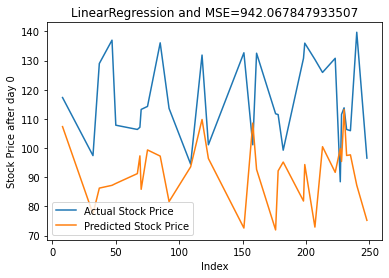

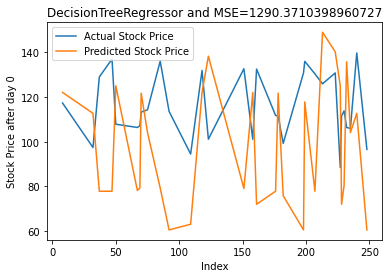

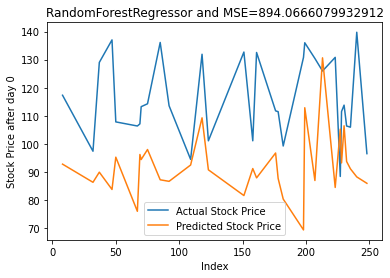

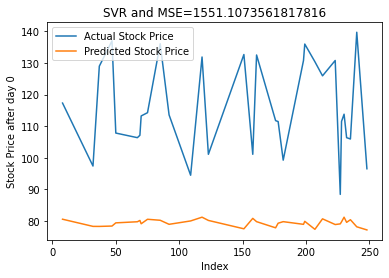

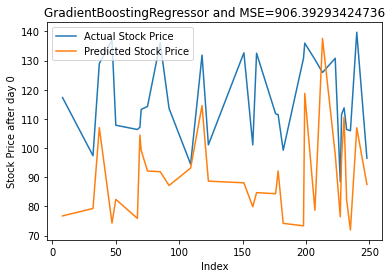

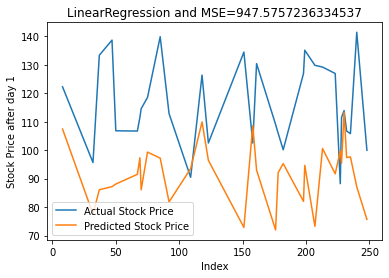

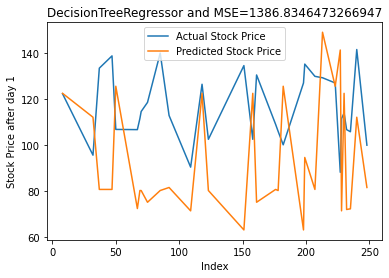

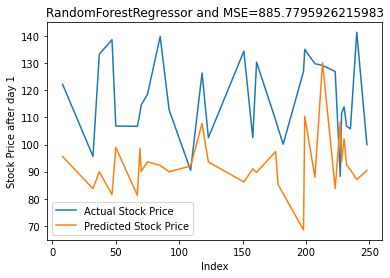

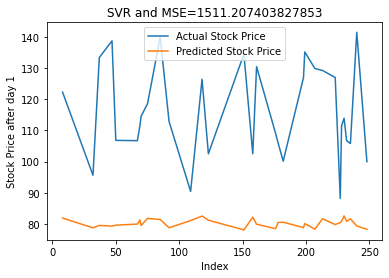

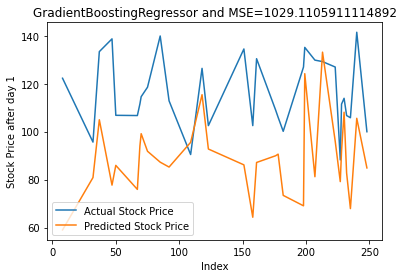

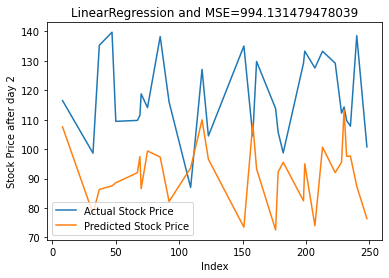

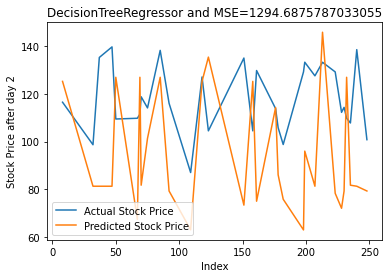

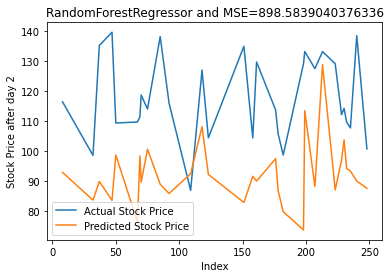

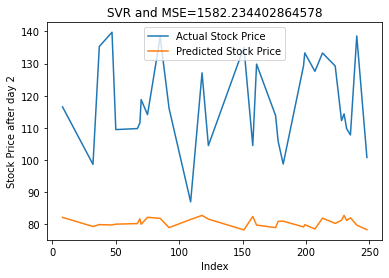

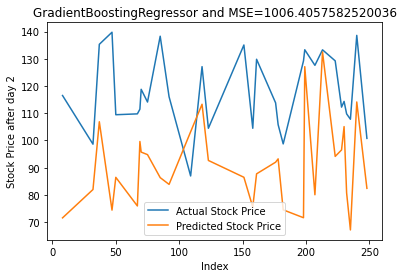

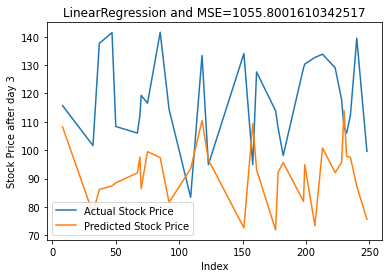

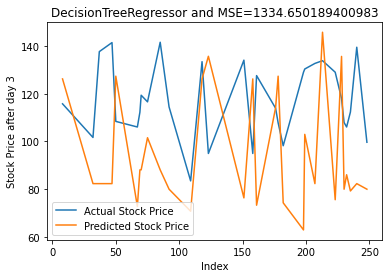

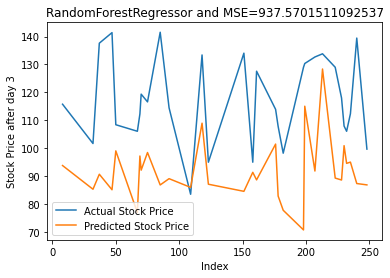

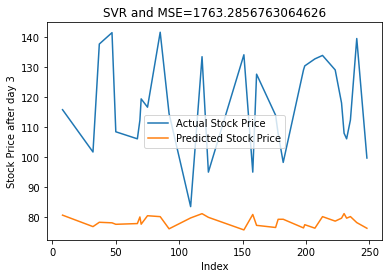

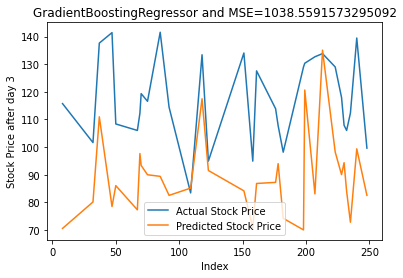

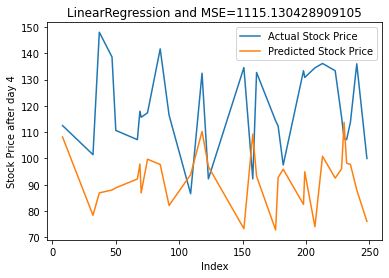

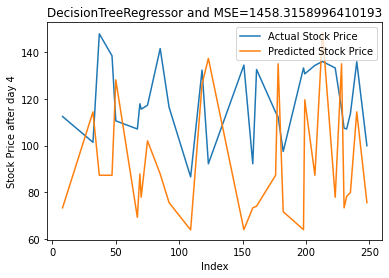

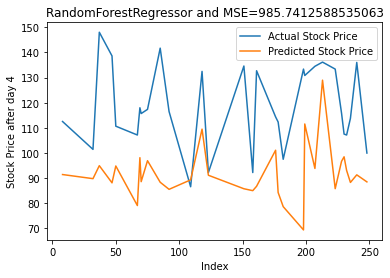

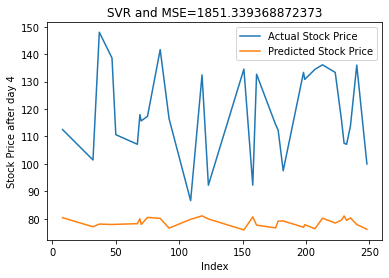

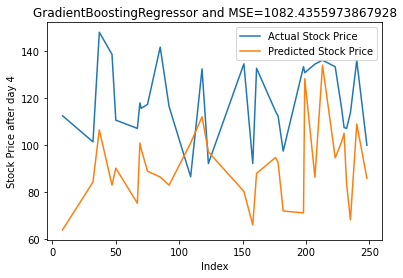

In [71]:
#day for which we want to predict the stock price
predictions_dict = {}
mse_dict ={}

#regression model list
regression_list = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),SVR(),GradientBoostingRegressor()]
regression_list_str = ["LinearRegression","DecisionTreeRegressor","RandomForestRegressor","SVR","GradientBoostingRegressor"]
# regression_list = [RandomForestRegressor()]
# regression_list_str = ["RandomForestRegressor"]



#features that we want to use
features = ['polarity', 'subjectivity', 'finbert-sentiment-score']

# Extract independent variables (X) and dependent variable (y)
X = media_data[features]

for i in days:

    y = media_data['stock_price_'+str(i)]

    #droping rows which have NaN value for a particular column
    media_data_test_without_NaN = media_data_test.dropna(subset=['stock_price_'+str(i)])

    # Make predictions using the trained model
    X_test = media_data_test_without_NaN[features]
    
    predictions_list = []
    mse_list = []

    for x in regression_list:
        regression_model = x

        # Fit the model to the data
        regression_model.fit(X, y)
        
        predictions = regression_model.predict(X_test)
        
        predictions_list.append(predictions)

        # Calculate the mean squared error
        mse_list.append(mean_squared_error(y_true=media_data_test_without_NaN['stock_price_'+str(i)], y_pred=predictions))
    
    predictions_dict[i] = predictions_list
    mse_dict[i] = mse_list

    for j in range(len(regression_list)):
        # Plot the columns
        plt.plot(media_data_test_without_NaN.index, media_data_test_without_NaN['stock_price_'+str(i)], label='Actual Stock Price')
        plt.plot(media_data_test_without_NaN.index, predictions_dict[i][j], label='Predicted Stock Price')
        plt.xlabel("Index")
        plt.ylabel("Stock Price after day "+str(i))
        plt.title(regression_list_str[j]+ " and MSE="+str(mse_dict[i][j]))
        plt.legend() #Add a legend to show the labels
        plt.show()


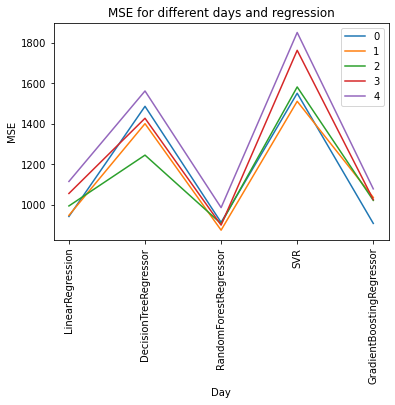

In [68]:
import matplotlib.pyplot as plt


# Plot the dictionary
for key, values in mse_dict.items():
    plt.plot(values, label=key)

# Set plot labels and title
plt.xlabel('Day')
plt.ylabel('MSE')
plt.title('MSE for different days and regression')

# Set x-axis tick positions and labels
plt.xticks(range(len(regression_list_str)), regression_list_str,rotation ='vertical')

# Add a legend
plt.legend()

# Display the plot
plt.show()

## Multi Layer Perceptron

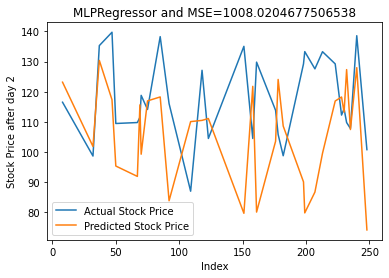

In [72]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='adam', random_state=42, learning_rate = 'invscaling',max_iter=5000, alpha = 0.001)

#features that we want to use
features = ['polarity', 'subjectivity', 'finbert-sentiment-score']

# Extract independent variables (X) and dependent variable (y)
X = media_data[features]
mlp_predictions_list = []
mlp_mse_list = []

test = [2]

for i in test:

    y = media_data['stock_price_'+str(i)]

    #droping rows which have NaN value for a particular column
    media_data_test_without_NaN = media_data_test.dropna(subset=['stock_price_'+str(i)])

    # Make predictions using the trained model
    X_test = media_data_test_without_NaN[features]
    
    regression_model = mlp

    # Fit the model to the data
    regression_model.fit(X, y)
    
    mlp_predictions_list.append(regression_model.predict(X_test))
    
    # Calculate the mean squared error
    mlp_mse_list.append(mean_squared_error(y_true=media_data_test_without_NaN['stock_price_'+str(i)], y_pred=predictions))
    
    plt.plot(media_data_test_without_NaN.index, media_data_test_without_NaN['stock_price_'+str(i)], label='Actual Stock Price')
    plt.plot(media_data_test_without_NaN.index, mlp_predictions_list[0], label='Predicted Stock Price')
    plt.xlabel("Index")
    plt.ylabel("Stock Price after day "+str(i))
    plt.title("MLPRegressor"+ " and MSE="+str(mlp_mse_list[0]))
    plt.legend() #Add a legend to show the labels
    plt.show()

## Neural Net

Epoch 1/100
3/3 [==============================] - 0s 3ms/step - loss: 9003.9805
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 8988.0127
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 8972.0469
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 8956.7432
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 8940.7207
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 8924.4502
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 8907.6387
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 8890.2549
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 8871.1582
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 8850.4688
Epoch 11/100
3/3 [==============================] - 0s 7ms/step - loss: 8828.2090
Epoch 12/100
3/3 [==============================] - 0s 7ms/step - loss: 8803.3418
Epoch 13/100
3/3 [=======

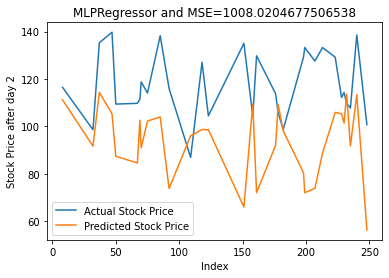

In [73]:
import tensorflow as tf
from tensorflow import keras

#features that we want to use
features = ['polarity', 'subjectivity', 'finbert-sentiment-score']

# Define the neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Extract independent variables (X) and dependent variable (y)
X = media_data[features]
nueral_net_predictions_list = []
nueral_net_mse_list = []

test = [2]

for i in test:

    y = media_data['stock_price_'+str(i)]

    #droping rows which have NaN value for a particular column
    media_data_test_without_NaN = media_data_test.dropna(subset=['stock_price_'+str(i)])

    # Make predictions using the trained model
    X_test = media_data_test_without_NaN[features]
    
    
    # Fit the model to the data
    model.fit(X, y, epochs=100, batch_size=32)  # Adjust the number of epochs and batch size as needed
    
    nueral_net_predictions_list.append(model.predict(X_test))
    
    # Calculate the mean squared error
    nueral_net_mse_list.append(mean_squared_error(y_true=media_data_test_without_NaN['stock_price_'+str(i)], y_pred=predictions))
    
    plt.plot(media_data_test_without_NaN.index, media_data_test_without_NaN['stock_price_'+str(i)], label='Actual Stock Price')
    plt.plot(media_data_test_without_NaN.index, nueral_net_predictions_list[0], label='Predicted Stock Price')
    plt.xlabel("Index")
    plt.ylabel("Stock Price after day "+str(i))
    plt.title("MLPRegressor"+ " and MSE="+str(nueral_net_mse_list[0]))
    plt.legend() #Add a legend to show the labels
    plt.show()